In [1]:
# Project 2 (Extended): Risk Metrics – Value-at-Risk & Conditional VaR
# Phase 1, Module 3 – Finance & Probability Foundations
# Fully reproducible with synthetic data

In [2]:
# In this project, we extend our Value-at-Risk (VaR) analysis by adding 
# Conditional VaR (CVaR), also called Expected Shortfall (ES).

# VaR (at confidence level α): the loss threshold not exceeded with probability α.

# CVaR (ES): the expected loss given that losses have exceeded VaR.

In [4]:
# Formally: CVaRα=E[Loss|Loss≥VaRα]
# CVaR is considered a coherent risk measure (unlike VaR) because 
# it accounts for the severity of tail losses.

In [5]:
# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
# For reproducibility
np.random.seed(42)

In [5]:
# Generate synthetic daily returns (normal distribution)
n_days = 252 * 5  # ~5 years of daily data
mu, sigma = 0.0005, 0.02  # mean daily return and std dev
returns = np.random.normal(mu, sigma, n_days)

In [6]:
# Convert to pandas Series
returns = pd.Series(returns, name="Synthetic Daily Returns")

In [7]:
returns.head()

0    0.010434
1   -0.002265
2    0.013454
3    0.030961
4   -0.004183
Name: Synthetic Daily Returns, dtype: float64

In [8]:
# Visualize Returns Distribution

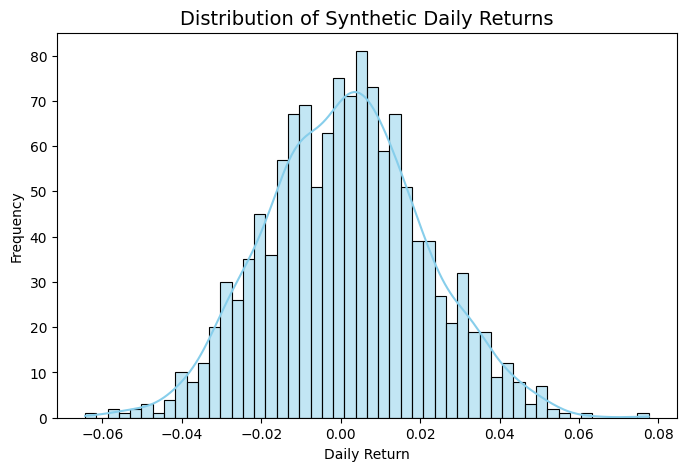

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(returns, bins=50, kde=True, color="skyblue")
plt.title("Distribution of Synthetic Daily Returns", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.savefig("charts/Distribution_of_Synthetic_Daily_Returns.png", dpi=300, bbox_inches="tight")
# plt.close()
plt.show()

In [13]:
# Historical VaR & CVaR

In [14]:
def historical_var(returns, alpha=0.05):
    """Historical (empirical) Value-at-Risk"""
    return np.percentile(returns, 100*alpha)

def historical_cvar(returns, alpha=0.05):
    """Conditional VaR (Expected Shortfall)"""
    var_level = historical_var(returns, alpha)
    return returns[returns <= var_level].mean()

# Example at 95% confidence
alpha = 0.05
VaR_95 = historical_var(returns, alpha)
CVaR_95 = historical_cvar(returns, alpha)

VaR_95, CVaR_95

(np.float64(-0.030518500836460148), np.float64(-0.03831069630908749))

In [15]:
# Variance-Covariance VaR & CVaR (Parametric)

In [16]:
def parametric_var(returns, alpha=0.05):
    mu, sigma = returns.mean(), returns.std()
    return mu + sigma * norm.ppf(alpha)

def parametric_cvar(returns, alpha=0.05):
    mu, sigma = returns.mean(), returns.std()
    var_level = parametric_var(returns, alpha)
    cvar = mu - sigma * norm.pdf(norm.ppf(alpha)) / alpha
    return cvar

VaR_param = parametric_var(returns, alpha)
CVaR_param = parametric_cvar(returns, alpha)

VaR_param, CVaR_param

(np.float64(-0.031289518321517426), np.float64(-0.03955901248508121))

In [17]:
# Monte Carlo VaR & CVaR

In [18]:
def monte_carlo_var_cvar(returns, alpha=0.05, n_sims=100000):
    mu, sigma = returns.mean(), returns.std()
    sims = np.random.normal(mu, sigma, n_sims)
    var = np.percentile(sims, 100*alpha)
    cvar = sims[sims <= var].mean()
    return var, cvar

VaR_mc, CVaR_mc = monte_carlo_var_cvar(returns, alpha)

VaR_mc, CVaR_mc

(np.float64(-0.031282864782896457), np.float64(-0.03961849600259632))

In [19]:
# Comparison of Risk Measures

In [20]:
results = pd.DataFrame({
    "Method": ["Historical", "Parametric (Var-Cov)", "Monte Carlo"],
    "VaR (95%)": [VaR_95, VaR_param, VaR_mc],
    "CVaR (95%)": [CVaR_95, CVaR_param, CVaR_mc]
})

results

,Method,VaR (95%),CVaR (95%)
0,Historical,-0.030519,-0.038311
1,Parametric (Var-Cov),-0.031290,-0.039559
2,Monte Carlo,-0.031283,-0.039618


In [21]:
# Visualizing VaR & CVaR

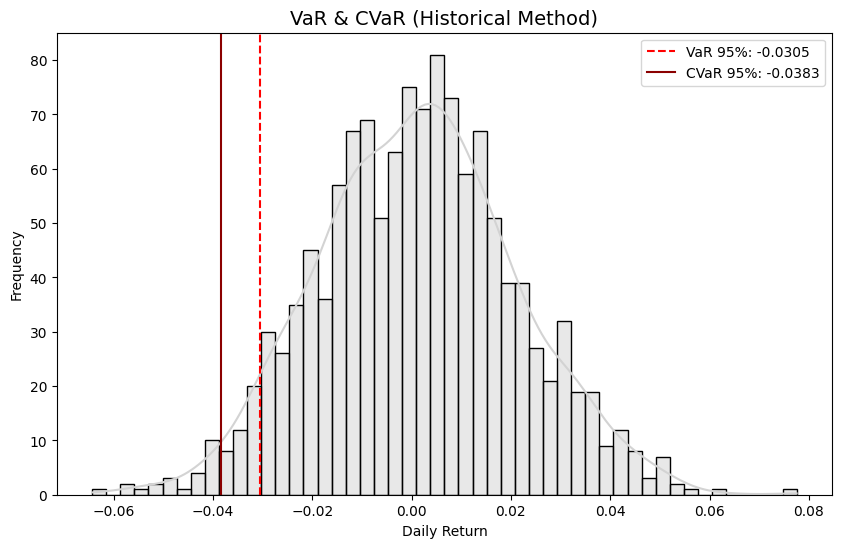

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(returns, bins=50, kde=True, color="lightgrey")

plt.axvline(VaR_95, color="red", linestyle="--", label=f"VaR 95%: {VaR_95:.4f}")
plt.axvline(CVaR_95, color="darkred", linestyle="-", label=f"CVaR 95%: {CVaR_95:.4f}")

plt.title("VaR & CVaR (Historical Method)", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.savefig("charts/VaR_&_CVaR_Historical_Method.png", dpi=300, bbox_inches="tight")
# plt.close()
plt.legend()
plt.show()